In [1]:
import pandas as pd                                         # type: ignore
import matplotlib.pyplot as plt                             # type: ignore

from sklearn.linear_model import Ridge , LinearRegression   # type: ignore
from sklearn.model_selection import train_test_split        # type: ignore
from sklearn.datasets import load_wine                      # type: ignore

In [2]:
wine    = load_wine()
wine_df = pd.DataFrame(wine.data , columns= wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
## add another column that contains the prices which in scikit learn datasets are considered as target
wine_df['Price'] = wine.target
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Price
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [5]:
new_X = wine_df.drop('Price',axis=1)
new_Y = wine_df['Price']

new_X[0:3]       # check 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [6]:
X_train,X_test,y_train,y_test=train_test_split(new_X,new_Y,test_size=0.3,random_state=3)

print(len(X_test))
print(len(y_test))

54
54


In [7]:
## apply linear regression:
lr = LinearRegression()
lr.fit(X_train, y_train)

## apply ridge:
## high alpha >> more restriction on the coefficients ; 
## low alpha >> more generalization, coefficients are barely
rr = Ridge(alpha=0.01)    
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100)    #  comparison with alpha value
rr100.fit(X_train, y_train)
#################################
train_score = lr.score(X_train, y_train)
test_score  = lr.score(X_test, y_test)
print(f'linear Regression Train Score : {train_score}')
print(f'linear Regression Test  Score : {test_score}\n')

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score  = rr.score(X_test, y_test)
print(f'ridge regression Train score low alpha : {Ridge_train_score}')
print(f'ridge regression Test  score low alpha : {Ridge_test_score}\n')

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100  = rr100.score(X_test, y_test)
print(f'ridge regression Train score high alpha : {Ridge_train_score100}')
print(f'ridge regression Test  score high alpha : {Ridge_test_score100}\n')

linear Regression Train Score : 0.9062862587932986
linear Regression Test  Score : 0.8714659814845565

ridge regression Train score low alpha : 0.9062862286173694
ridge regression Test  score low alpha : 0.8714488407201162

ridge regression Train score high alpha : 0.8568269158321241
ridge regression Test  score high alpha : 0.809823876919363



findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


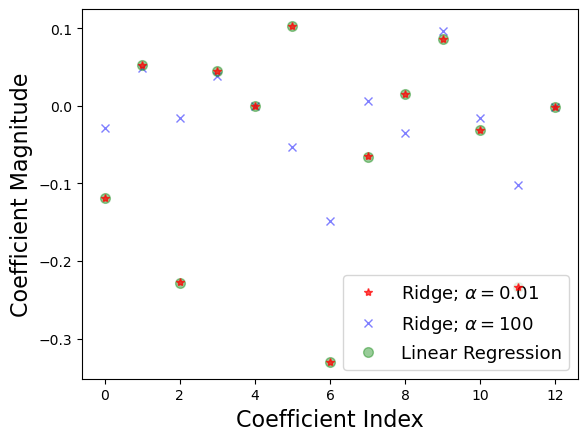

In [8]:
## graph:
plt.plot(rr.coef_    , alpha=0.7, linestyle='none', marker='*', markersize=6, color='red'  , label=r'Ridge; $\alpha = 0.01$',zorder=7)  # zorder for ordering the markers
plt.plot(rr100.coef_ , alpha=0.5, linestyle='none', marker='x', markersize=6, color='blue' , label=r'Ridge; $\alpha = 100$')            # alpha here is for transparency
plt.plot(lr.coef_    , alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()